# Dataset
Credit Card Customer Dataset   
Dataset can be found in: https://www.kaggle.com/sakshigoyal7/credit-card-customers

### What is inside the dataset? 

* **CLIENTNUM:** Client number. Unique identifier for the customer holding the account
* **Attrition_Flag:** Internal event (customer activity) variable - if the account is closed then 1 else 0
* **Customer_Age:** Demographic variable - Customer's Age in Years
* **Gender:** Demographic variable - M=Male, F=Female
* **Dependent_count:** Demographic variable - Number of dependents
* **Education_Level:** Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
* **Marital_Status:** Demographic variable - Married, Single, Divorced, Unknown
* **Income_Category:** Demographic variable - Annual Income Category of the account holder (<40K, 40K-60K, 60K-80K, 80K-120K, >120K)

* **Card_Category:** Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
* **Months_on_book:** Period of relationship with bank
* **Total_Relationship_Count:** Total no. of products held by the customer
* **Months_Inactive_12_mon:** No. of months inactive in the last 12 months
* **Contacts_Count_12_mon:** No. of Contacts in the last 12 months
* **Credit_Limit:** Credit Limit on the Credit Card
* **Total_Revolving_Bal:** Total Revolving Balance on the Credit Card
* **Avg_Open_To_Buy:** Open to Buy Credit Line (Average of last 12 months)
* **Total_Amt_Chng_Q4_Q1:** Change in Transaction Amount (Q4 over Q1)
* **Total_Trans_Amt:** Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct:** Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1:** Change in Transaction Count (Q4 over Q1)
* **Avg_Utilization_Ratio:** Average Card Utilization Ratio

## Problem Statement

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

## Essential Libraries

Let us begin by importing the essential Python Libraries.

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

#Data Visualisation
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Machine Learning
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder

#Import GridSearch
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

# Resample to balance classes
from sklearn.utils import resample

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Import Dataset

In [ ]:
o_data = pd.read_csv("BankChurners.csv", header=0)
o_data = o_data.copy().iloc[:,0:-2]
o_data

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
...               ...  ...                     ...                    ...   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124  

Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [ ]:
print("Data type : ", type(o_data))
print("Data dims : ", o_data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (10127, 21)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [ ]:
o_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int

It would seem that there are `10127` rows and `21` columns.  

## Clean and transform the data
It seems that **none of the columns have NULL values**, based on previous cells.  
Convert values to numeric values. 

In [ ]:
obj_cols = o_data.columns[o_data.dtypes == 'object']
obj_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [ ]:
o_data.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
o_data.Gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [ ]:
o_data.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [ ]:
o_data.Marital_Status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [ ]:
o_data.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
o_data.Card_Category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

 sklearn models do not handle categorical variables directly.   
 Convert the categorical values to numerical. 

In [ ]:
#Convert the Response to binary, 0 and 1
o_data['Attrition_Flag'] = o_data['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1}).astype(int)

#Any other conversion? 
o_data['Income_Category-Unknown'] = o_data['Income_Category'].apply(lambda x: 1 if x == "Unknown" else 0)
o_data['Income_Category'] = o_data['Income_Category'].map({'Unknown':0,
                                                           'Less than $40K':1,
                                                           '$40K - $60K':2,
                                                           '$60K - $80K':3,
                                                           '$80K - $120K':4,
                                                           '$120K +':5}).astype(int)

#categorical data
cat_cols = o_data.columns[o_data.dtypes == 'object']
cat_data = o_data.loc[:,cat_cols]

#numeric data + response
num_cols = o_data.columns[(o_data.dtypes == 'int32')|(o_data.dtypes == 'int64')|(o_data.dtypes == "float64")]
num_data = o_data.loc[:,num_cols]

In [ ]:
o_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null int32
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null int32
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int64

In [ ]:
#One Hot Encoding for Categorical Data
ohe = OneHotEncoder()
ohe.fit(cat_data)
ohe_cat_data = pd.DataFrame(ohe.transform(cat_data).toarray(),
                           columns = ohe.get_feature_names_out(cat_data.columns))
ohe_cat_data.info()
ohe_cat_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
Gender_F                         10127 non-null float64
Gender_M                         10127 non-null float64
Education_Level_College          10127 non-null float64
Education_Level_Doctorate        10127 non-null float64
Education_Level_Graduate         10127 non-null float64
Education_Level_High School      10127 non-null float64
Education_Level_Post-Graduate    10127 non-null float64
Education_Level_Uneducated       10127 non-null float64
Education_Level_Unknown          10127 non-null float64
Marital_Status_Divorced          10127 non-null float64
Marital_Status_Married           10127 non-null float64
Marital_Status_Single            10127 non-null float64
Marital_Status_Unknown           10127 non-null float64
Card_Category_Blue               10127 non-null float64
Card_Category_Gold               10127 non-null float64
Card_Category_Platinum           10127 non-null flo

Gender_F  Gender_M  Education_Level_College  Education_Level_Doctorate  \
0           0.0       1.0                      0.0                        0.0   
1           1.0       0.0                      0.0                        0.0   
2           0.0       1.0                      0.0                        0.0   
3           1.0       0.0                      0.0                        0.0   
4           0.0       1.0                      0.0                        0.0   
...         ...       ...                      ...                        ...   
10122       0.0       1.0                      0.0                        0.0   
10123       0.0       1.0                      0.0                        0.0   
10124       1.0       0.0                      0.0                        0.0   
10125       0.0       1.0                      0.0                        0.0   
10126       1.0       0.0                      0.0                        0.0   

       Education_Level_Graduate  Education_Level_High School  \
0                           0.0                          1.0   
1                           1.0                          0.0   
2                           1.0                          0.0   
3                           0.0                          1.0   
4                           0.0                          0.0   
...                         ...                          ...   
10122                       1.0                          0.0   
10123                       0.0                          0.0   
10124                       0.0                          1.0   
10125                       1.0                          0.0   
10126                       1.0                          0.0   

       Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   
4                                0.0                         1.0   
...                              ...                         ...   
10122                            0.0                         0.0   
10123                            0.0                         0.0   
10124                            0.0                         0.0   
10125                            0.0                         0.0   
10126                            0.0                         0.0   

       Education_Level_Unknown  Marital_Status_Divorced  \
0                          0.0                      0.0   
1                          0.0                      0.0   
2                          0.0                      0.0   
3                          0.0                      0.0   
4                          0.0                      0.0   
...                        ...                      ...   
10122                      0.0                      0.0   
10123                      1.0                      1.0   
10124                      0.0                      0.0   
10125                      0.0                      0.0   
10126                      0.0                      0.0   

       Marital_Status_Married  Marital_Status_Single  Marital_Status_Unknown  \
0                         1.0                    0.0                     0.0   
1                         0.0                    1.0                     0.0   
2                         1.0                    0.0                     0.0   
3                         0.0                    0.0                     1.0   
4                         1.0                    0.0                     0.0   
...                       ...                    ...                     ...   
10122                     0.0                    1.0                     0.0   
10123                     0.0                    0.0                     0.0   
10124              

In [ ]:
#Combine the numeric and categorical and response together
data = pd.concat([num_data,ohe_cat_data],
                sort=False,axis=1).reindex()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 35 columns):
CLIENTNUM                        10127 non-null int64
Attrition_Flag                   10127 non-null int32
Customer_Age                     10127 non-null int64
Dependent_count                  10127 non-null int64
Income_Category                  10127 non-null int32
Months_on_book                   10127 non-null int64
Total_Relationship_Count         10127 non-null int64
Months_Inactive_12_mon           10127 non-null int64
Contacts_Count_12_mon            10127 non-null int64
Credit_Limit                     10127 non-null float64
Total_Revolving_Bal              10127 non-null int64
Avg_Open_To_Buy                  10127 non-null float64
Total_Amt_Chng_Q4_Q1             10127 non-null float64
Total_Trans_Amt                  10127 non-null int64
Total_Trans_Ct                   10127 non-null int64
Total_Ct_Chng_Q4_Q1              10127 non-null float64
Avg_Utilization_Rat

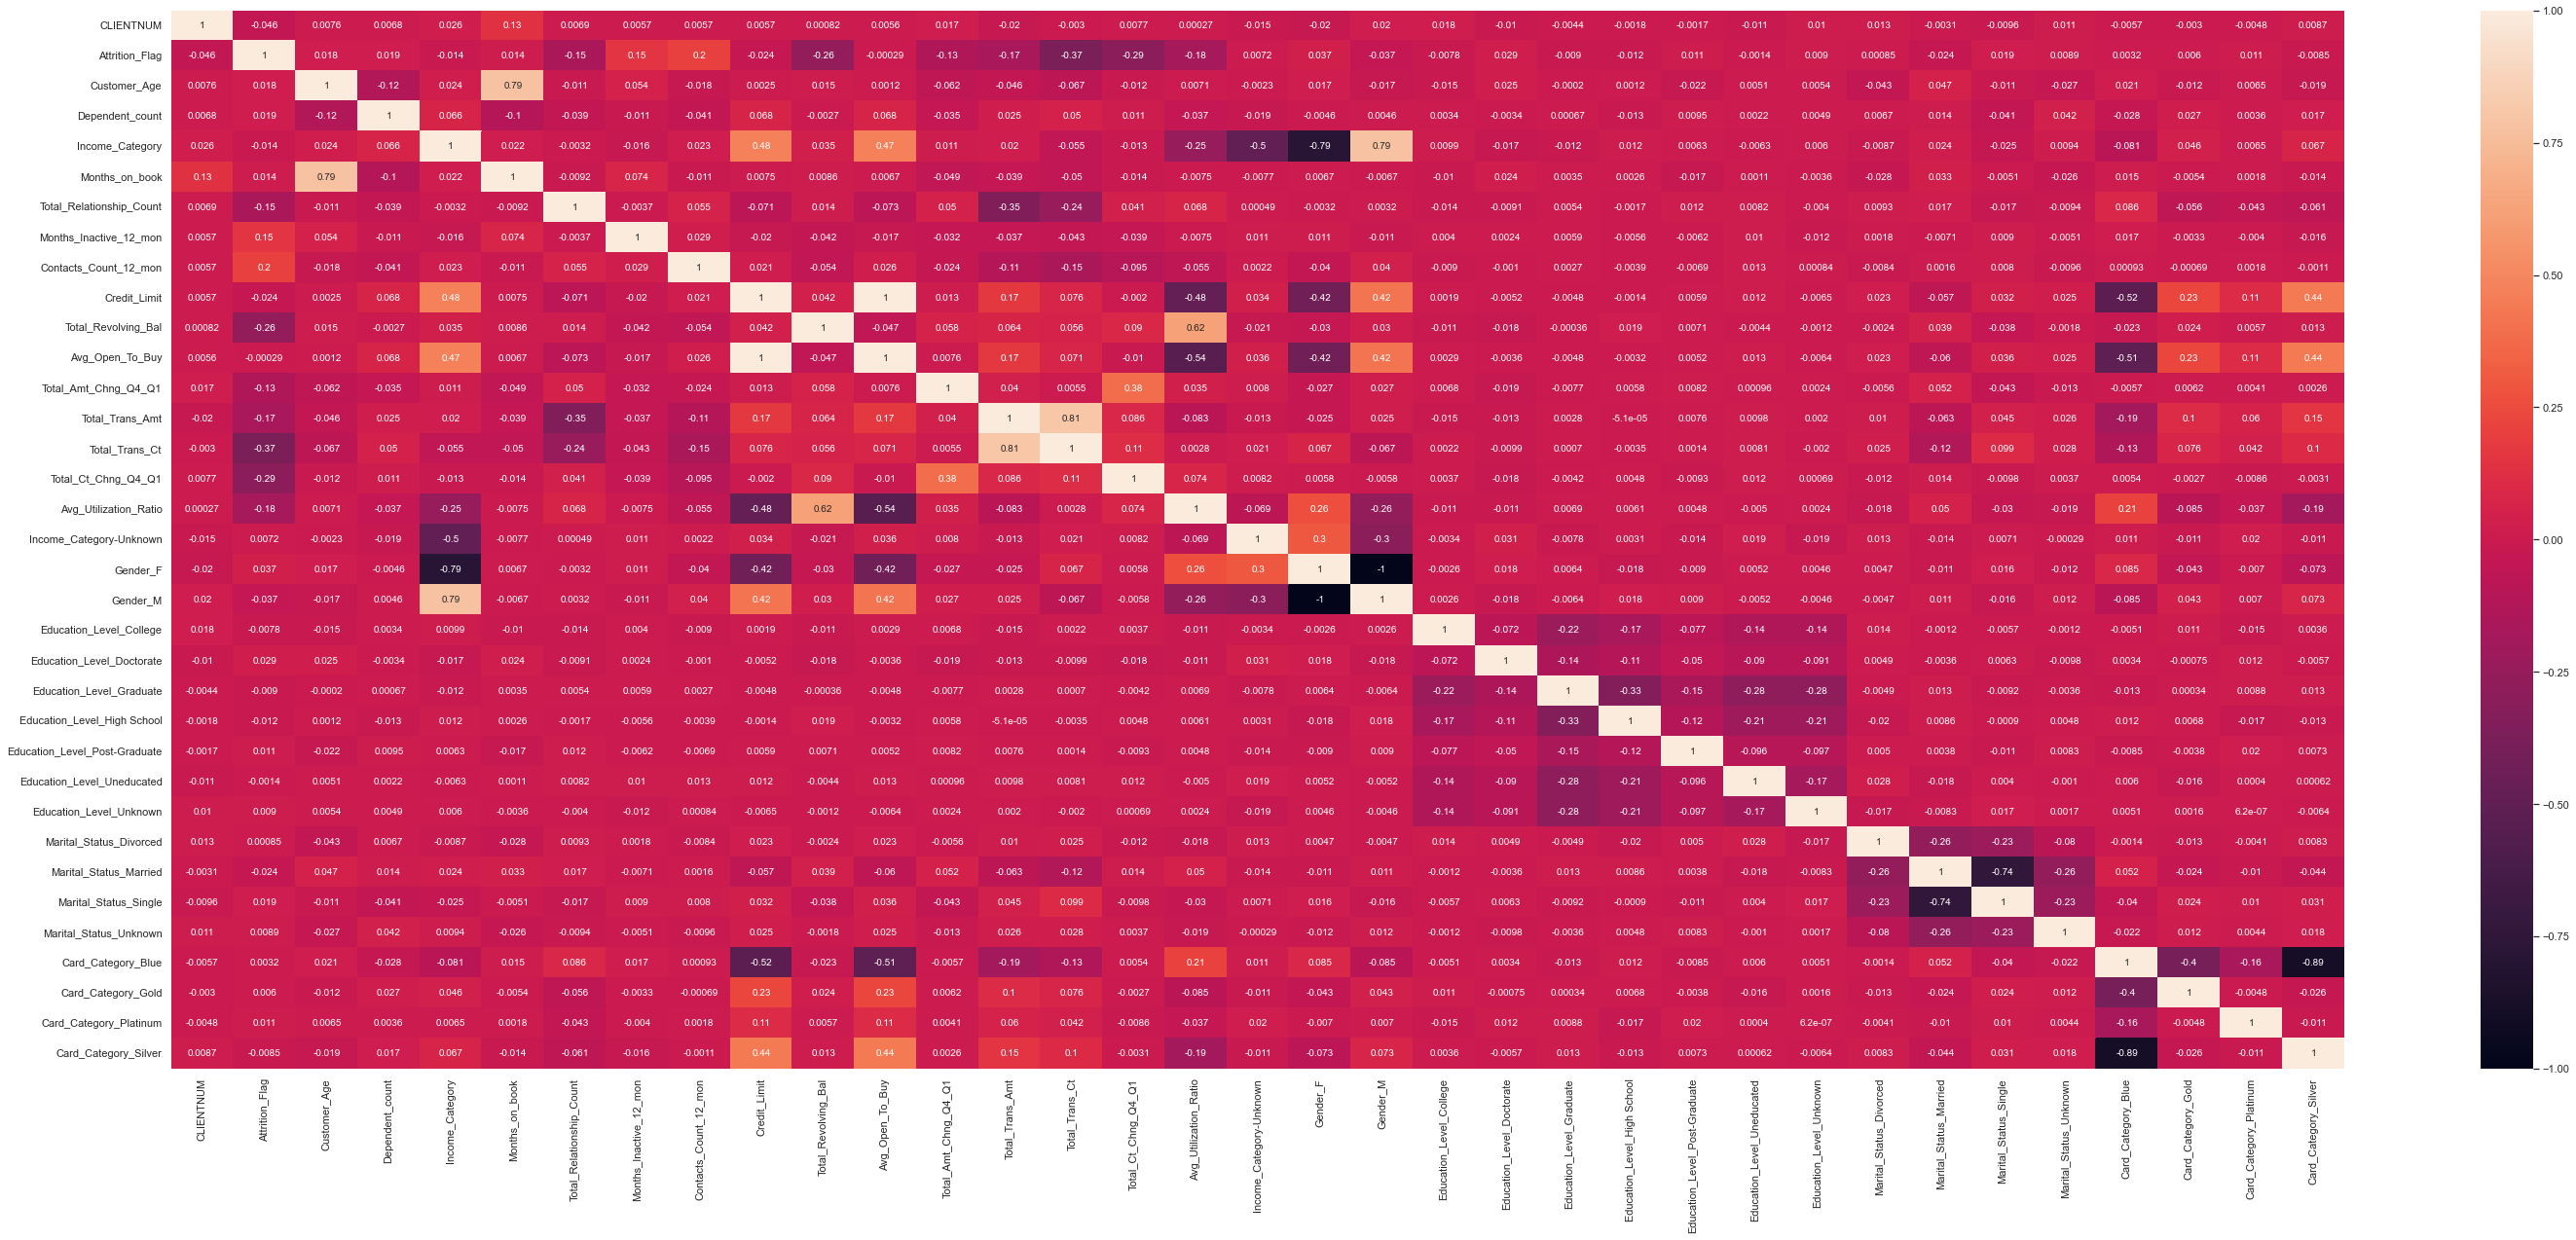

In [ ]:
# Calculating the correlation matrix
corr = data.corr()
# Generating a heatmap
plt.figure(figsize=(50,20))
ax = sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,annot=True,)

#ensure that top and bottom rows aren't cut off
b, t = plt.ylim() # discover the values for bottom and top
#plt.ylim(b + 0.5, t - 0.5)

# Decision Tree

### Train Test Split

In [ ]:
df_X = data.copy().drop(axis=1,labels=['Attrition_Flag','CLIENTNUM','Avg_Open_To_Buy'])
df_y = data.loc[:,"Attrition_Flag"]
X = df_X.values
y = df_y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

In [ ]:
print (X.shape)
print (y.shape)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(10127, 32)
(10127,)
(7088, 32)
(7088,)
(3039, 32)
(3039,)


### Decision Tree

In [ ]:
# Create a Decision Tree Classifier object
dt1 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dt1.fit(X_train, y_train)                    # train the decision tree model


DecisionTreeClassifier(max_depth=4)

[Text(0.5, 0.9, 'Total_Trans_Ct <= 54.5\ngini = 0.271\nsamples = 7088\nvalue = [5944, 1144]\nclass = Existing Customers'),
 Text(0.25, 0.7, 'Total_Revolving_Bal <= 615.5\ngini = 0.473\nsamples = 2412\nvalue = [1488, 924]\nclass = Existing Customers'),
 Text(0.125, 0.5, 'Total_Ct_Chng_Q4_Q1 <= 0.646\ngini = 0.382\nsamples = 798\nvalue = [205, 593]\nclass = Attrited Customers'),
 Text(0.0625, 0.3, 'Months_Inactive_12_mon <= 1.5\ngini = 0.266\nsamples = 594\nvalue = [94, 500]\nclass = Attrited Customers'),
 Text(0.03125, 0.1, 'gini = 0.499\nsamples = 59\nvalue = [31, 28]\nclass = Existing Customers'),
 Text(0.09375, 0.1, 'gini = 0.208\nsamples = 535\nvalue = [63, 472]\nclass = Attrited Customers'),
 Text(0.1875, 0.3, 'Total_Relationship_Count <= 2.5\ngini = 0.496\nsamples = 204\nvalue = [111, 93]\nclass = Existing Customers'),
 Text(0.15625, 0.1, 'gini = 0.049\nsamples = 40\nvalue = [1, 39]\nclass = Attrited Customers'),
 Text(0.21875, 0.1, 'gini = 0.442\nsamples = 164\nvalue = [110, 54]\

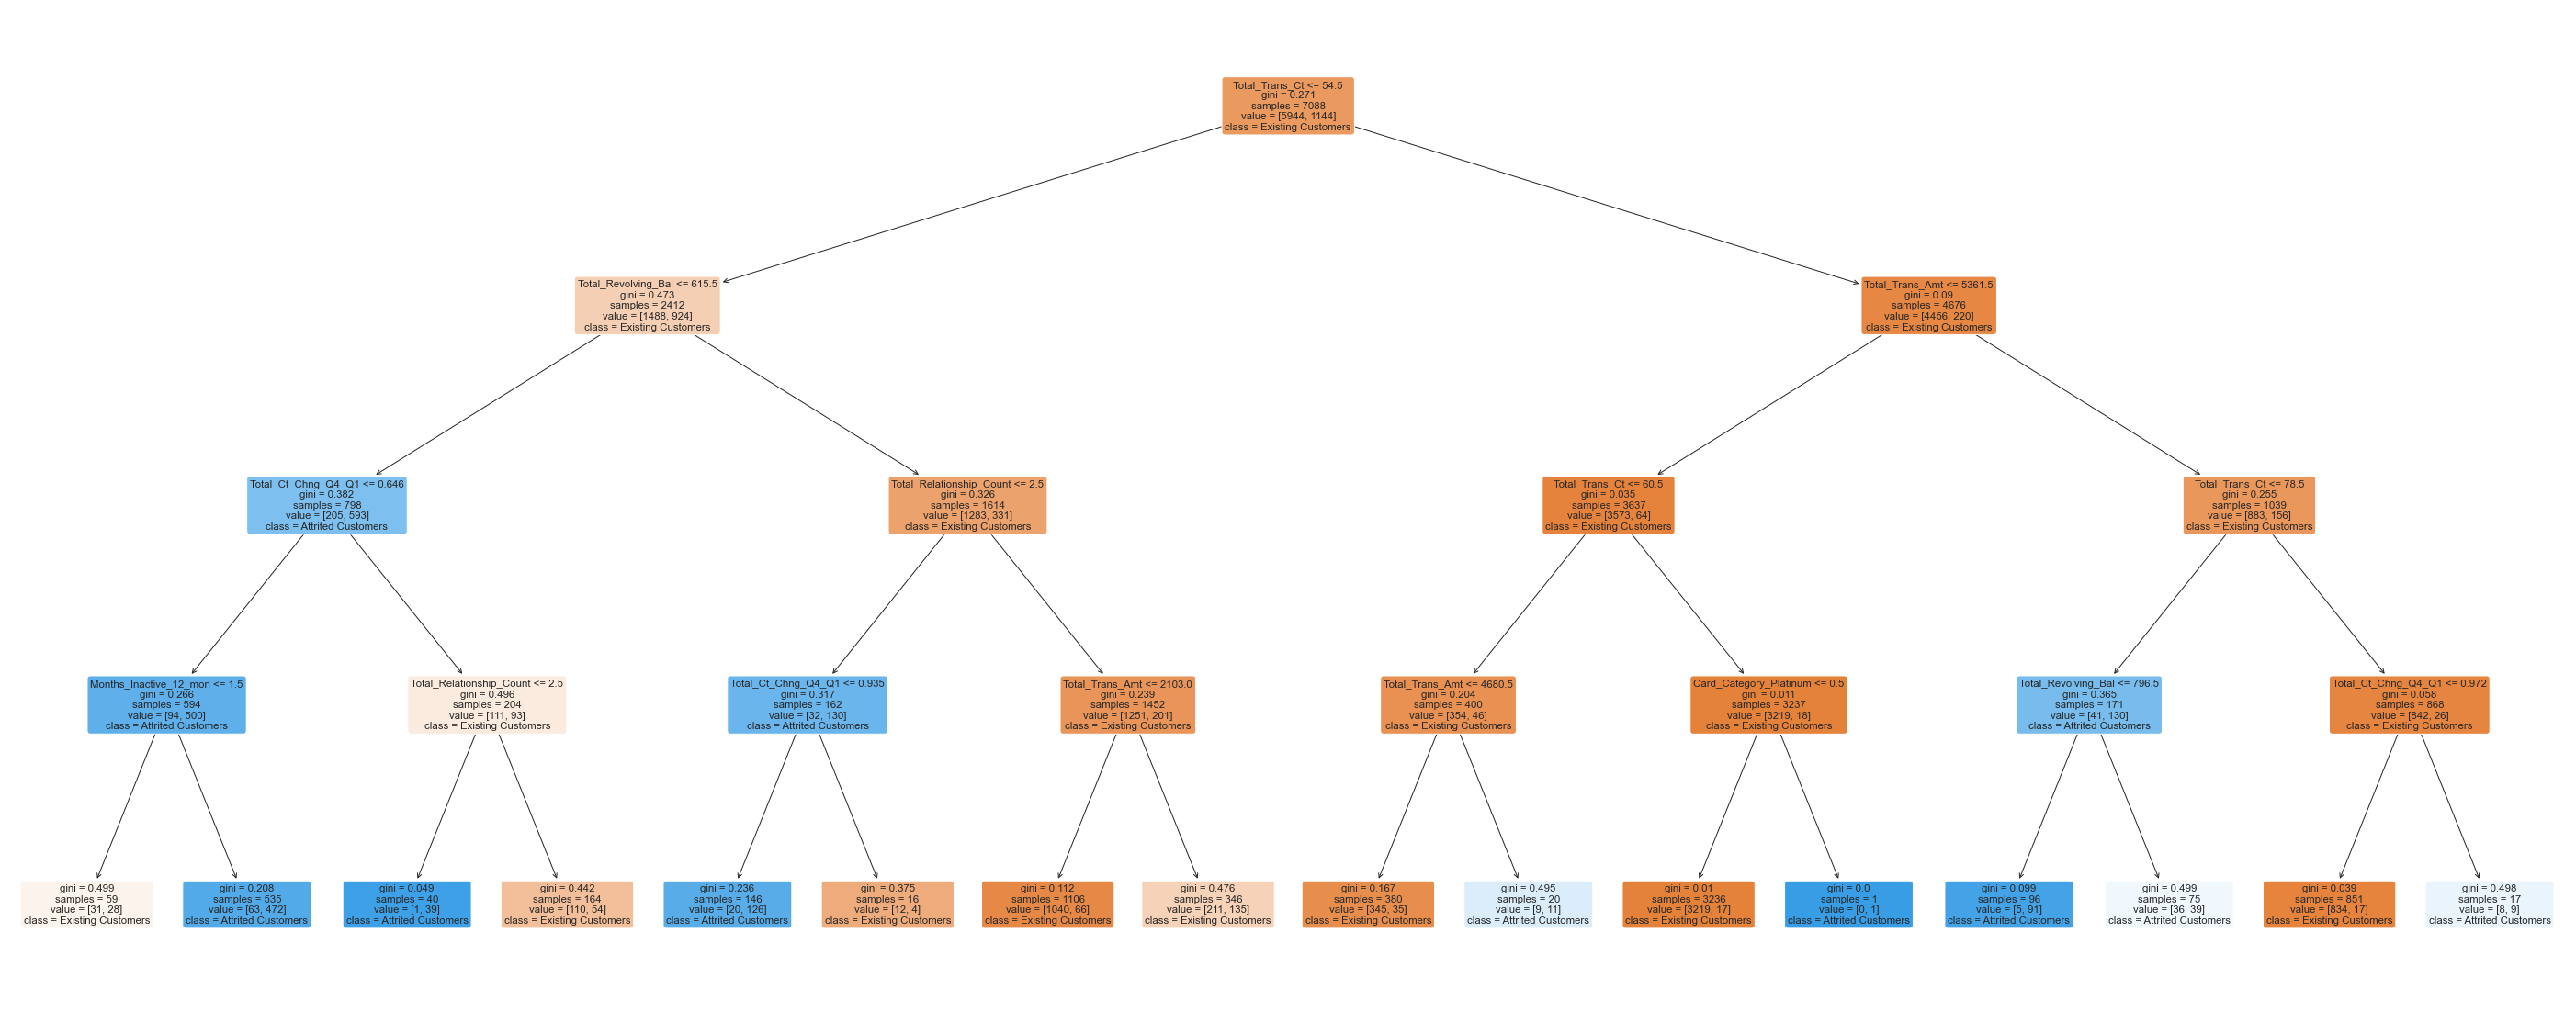

In [ ]:
#plot decision tree
f1 = plt.figure(figsize=(50,20))
plot_tree(dt1, filled=True, rounded=True, 
          feature_names=df_X.columns,
          class_names=['Existing Customers','Attrited Customers'])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9297404063205418

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9174070417900625

                   precision    recall  f1-score   support

Existing Customer       0.93      0.97      0.95      2556
Attrited Customer       0.81      0.62      0.71       483

         accuracy                           0.92      3039
        macro avg       0.87      0.80      0.83      3039
     weighted avg       0.91      0.92      0.91      3039



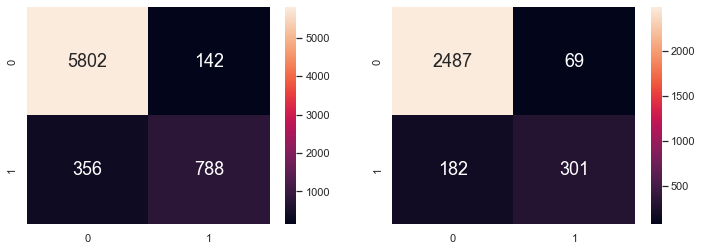

In [ ]:
# Predict Legendary values corresponding to Total
y_train_pred = dt1.predict(X_train)
y_test_pred = dt1.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dt1.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dt1.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
print(classification_report(y_test, y_test_pred, target_names=['Existing Customer','Attrited Customer']))

In [ ]:
# Use GridSearch to find the best combination of model hyperparameters

dt = DecisionTreeClassifier(max_depth = 2)

param_grid = { "criterion" : ["gini", "entropy"],  
              'max_depth' : [2,3,4,5,6,7,8,9,10,11,12]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

best_param = gs.best_params_


0.9452632816173013
{'criterion': 'gini', 'max_depth': 8}


In [ ]:
dt2 = DecisionTreeClassifier(criterion = best_param['criterion'], 
                             max_depth = best_param['max_depth'])
#fitting the parameters into the Decision Tree
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

[Text(0.5404575892857143, 0.9444444444444444, 'Total_Trans_Ct <= 54.5\ngini = 0.271\nsamples = 7088\nvalue = [5944, 1144]\nclass = Existing Customers'),
 Text(0.27957589285714285, 0.8333333333333334, 'Total_Revolving_Bal <= 615.5\ngini = 0.473\nsamples = 2412\nvalue = [1488, 924]\nclass = Existing Customers'),
 Text(0.15029761904761904, 0.7222222222222222, 'Total_Ct_Chng_Q4_Q1 <= 0.646\ngini = 0.382\nsamples = 798\nvalue = [205, 593]\nclass = Attrited Customers'),
 Text(0.09375, 0.6111111111111112, 'Months_Inactive_12_mon <= 1.5\ngini = 0.266\nsamples = 594\nvalue = [94, 500]\nclass = Attrited Customers'),
 Text(0.046130952380952384, 0.5, 'Total_Trans_Amt <= 2088.5\ngini = 0.499\nsamples = 59\nvalue = [31, 28]\nclass = Existing Customers'),
 Text(0.026785714285714284, 0.3888888888888889, 'Total_Trans_Amt <= 1062.5\ngini = 0.444\nsamples = 42\nvalue = [28, 14]\nclass = Existing Customers'),
 Text(0.011904761904761904, 0.2777777777777778, 'Credit_Limit <= 2508.15\ngini = 0.198\nsamples =

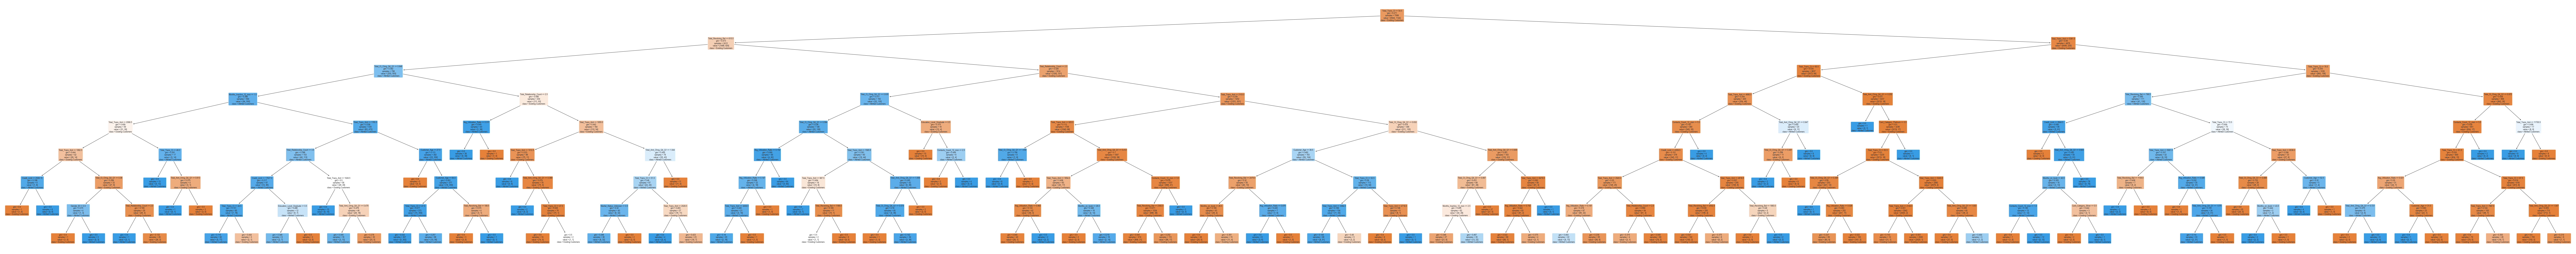

In [ ]:
#plot decision tree
f2 = plt.figure(figsize=(200,20))
plot_tree(dt2, filled=True, rounded=True, 
          feature_names=df_X.columns,
          class_names=['Existing Customers','Attrited Customers'])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9748871331828443

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9430733794011188

                   precision    recall  f1-score   support

Existing Customer       0.97      0.97      0.97      2556
Attrited Customer       0.82      0.82      0.82       483

         accuracy                           0.94      3039
        macro avg       0.89      0.89      0.89      3039
     weighted avg       0.94      0.94      0.94      3039



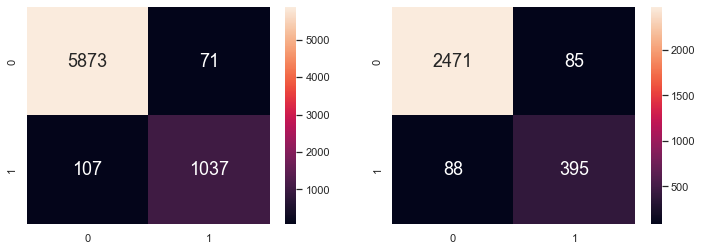

In [ ]:
# Predict Legendary values corresponding to Total
y_train_pred = dt2.predict(X_train)
y_test_pred = dt2.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dt2.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dt2.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
print(classification_report(y_test, y_test_pred, target_names=['Existing Customer','Attrited Customer']))

# Decision Tree + Resampling Data
Noticing that the data is very skewed as only 1627 of the 10127 data was for "Attrited Customer" response, we decided to do resampling to balance the classes

### Resample Data

In [ ]:
# Get different response sample
attrited_data = data[data.Attrition_Flag == 1]
existing_data = data[data.Attrition_Flag == 0]
 
# Upsample the Bad samples
attrited_data_up = resample(attrited_data, 
                            replace=True,                       # sample with replacement
                            n_samples=existing_data.shape[0])   # to match number of existing
 
# Combine the two classes back after upsampling
data_up = pd.concat([existing_data, attrited_data_up])
 
# Check the ratio of the classes
data_up['Attrition_Flag'].value_counts()

1    8500
0    8500
Name: Attrition_Flag, dtype: int64

### Train Test Split

In [ ]:
df_X = data_up.copy().drop(axis=1,labels=['Attrition_Flag','CLIENTNUM','Avg_Open_To_Buy'])
df_y = data_up.loc[:,"Attrition_Flag"]
X = df_X.values
y = df_y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

In [ ]:
print (X.shape)
print (y.shape)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(17000, 32)
(17000,)
(11900, 32)
(11900,)
(5100, 32)
(5100,)


### Decision Tree

In [ ]:
# Create a Decision Tree Classifier object
dt1 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dt1.fit(X_train, y_train)                    # train the decision tree model


DecisionTreeClassifier(max_depth=4)

[Text(0.5, 0.9, 'Total_Trans_Ct <= 60.5\ngini = 0.5\nsamples = 11900\nvalue = [6018, 5882]\nclass = Existing Customers'),
 Text(0.25, 0.7, 'Total_Revolving_Bal <= 613.5\ngini = 0.391\nsamples = 6924\nvalue = [1849, 5075]\nclass = Attrited Customers'),
 Text(0.125, 0.5, 'Total_Amt_Chng_Q4_Q1 <= 1.06\ngini = 0.141\nsamples = 3523\nvalue = [268, 3255]\nclass = Attrited Customers'),
 Text(0.0625, 0.3, 'Months_Inactive_12_mon <= 1.5\ngini = 0.127\nsamples = 3477\nvalue = [236, 3241]\nclass = Attrited Customers'),
 Text(0.03125, 0.1, 'gini = 0.389\nsamples = 299\nvalue = [79, 220]\nclass = Attrited Customers'),
 Text(0.09375, 0.1, 'gini = 0.094\nsamples = 3178\nvalue = [157, 3021]\nclass = Attrited Customers'),
 Text(0.1875, 0.3, 'Total_Ct_Chng_Q4_Q1 <= 0.517\ngini = 0.423\nsamples = 46\nvalue = [32, 14]\nclass = Existing Customers'),
 Text(0.15625, 0.1, 'gini = 0.124\nsamples = 15\nvalue = [1, 14]\nclass = Attrited Customers'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]\

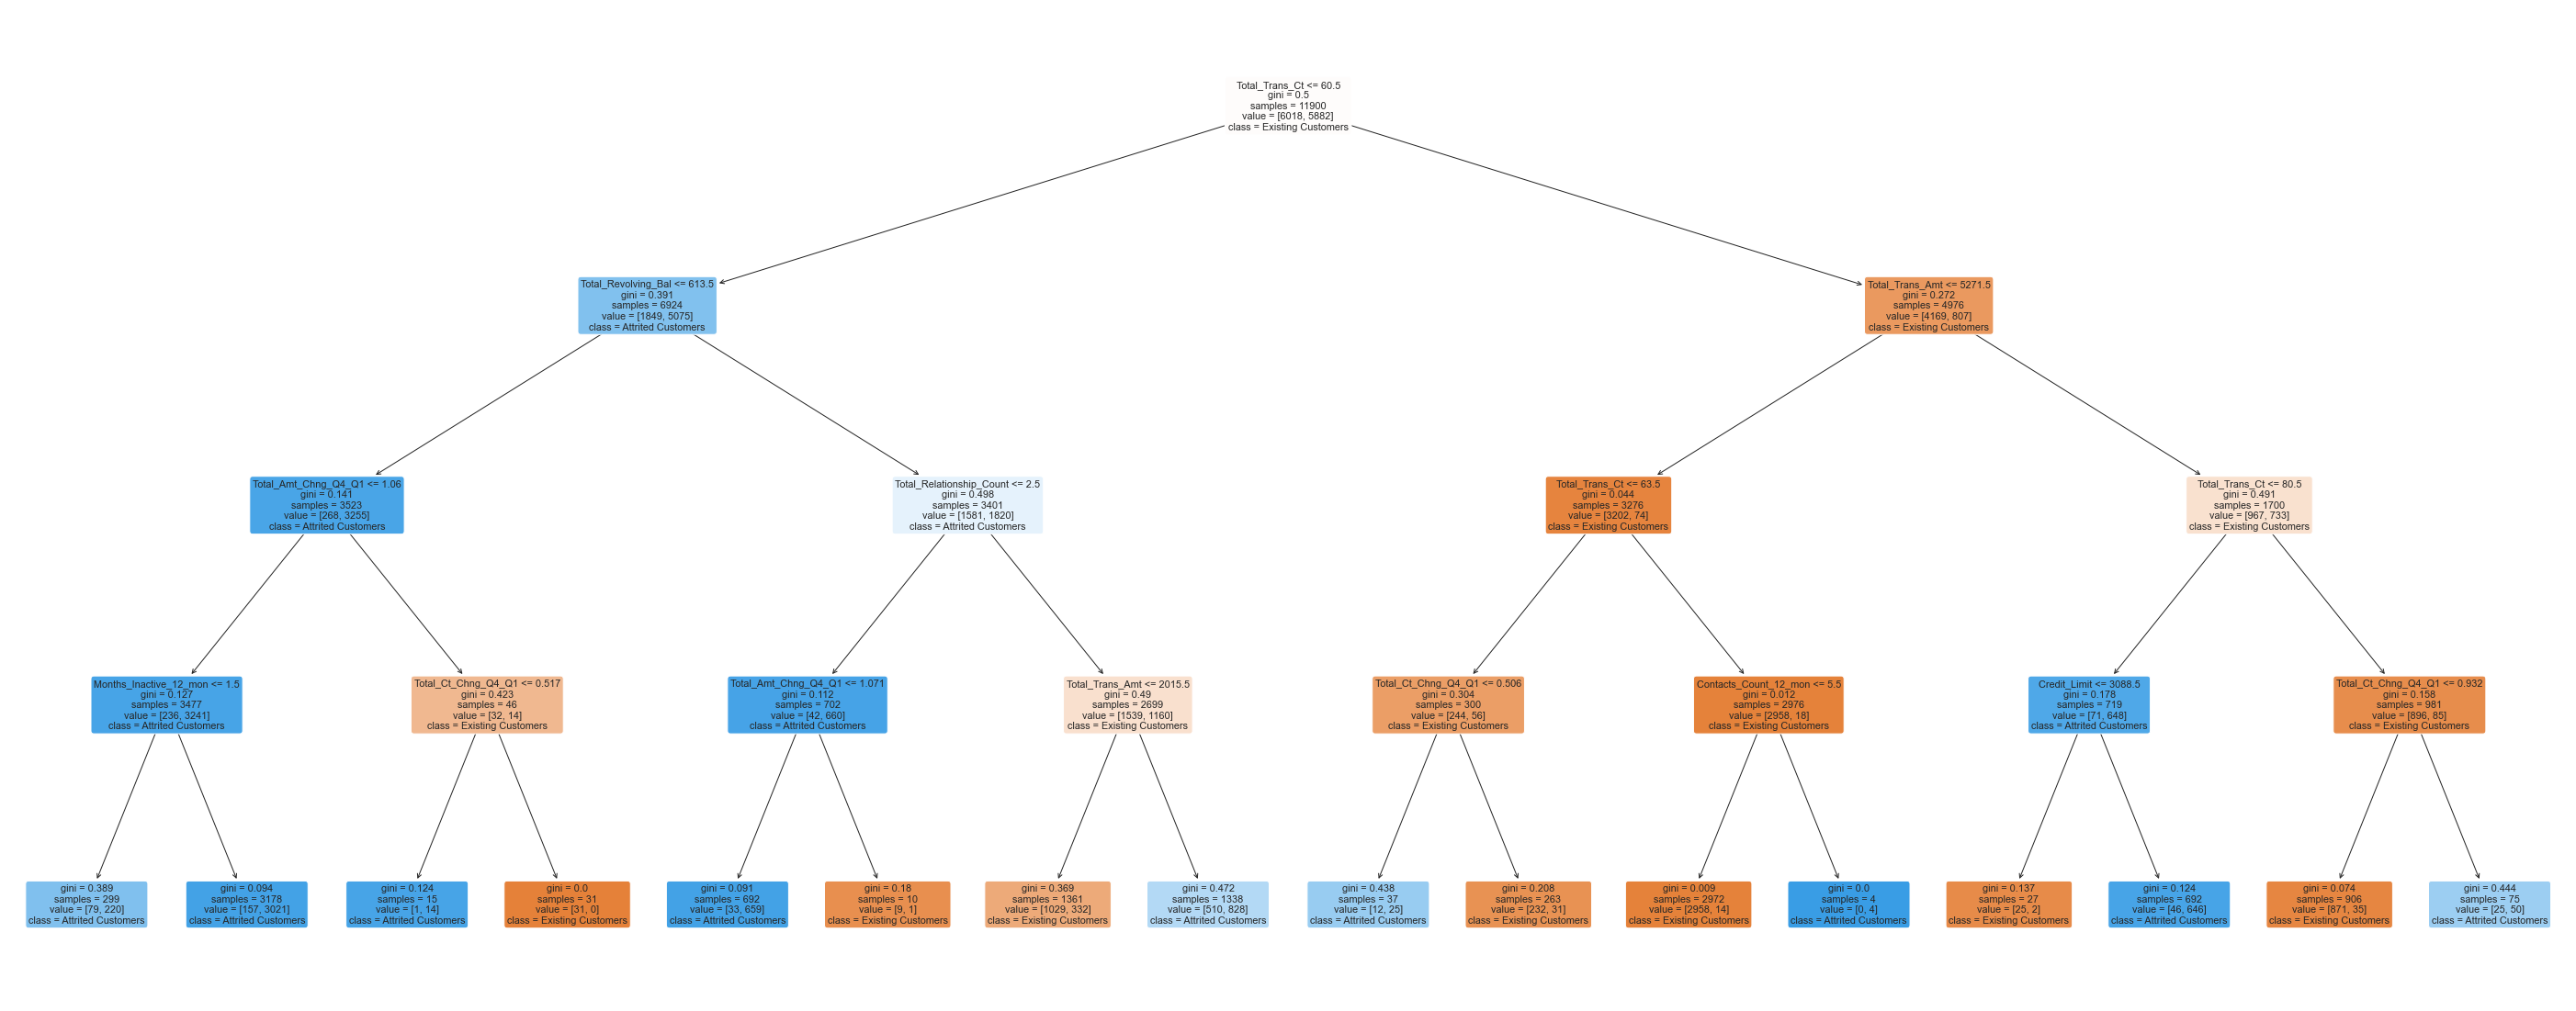

In [ ]:
#plot decision tree
f1 = plt.figure(figsize=(50,20))
plot_tree(dt1, filled=True, rounded=True, 
          feature_names=df_X.columns,
          class_names=['Existing Customers','Attrited Customers'])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8926050420168067

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8845098039215686

                   precision    recall  f1-score   support

Existing Customer       0.91      0.85      0.88      2482
Attrited Customer       0.86      0.92      0.89      2618

         accuracy                           0.88      5100
        macro avg       0.89      0.88      0.88      5100
     weighted avg       0.89      0.88      0.88      5100



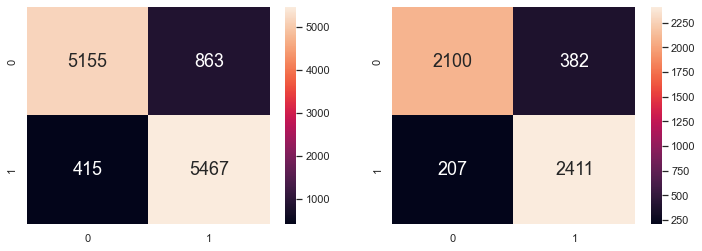

In [ ]:
# Predict Legendary values corresponding to Total
y_train_pred = dt1.predict(X_train)
y_test_pred = dt1.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dt1.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dt1.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
print(classification_report(y_test, y_test_pred, target_names=['Existing Customer','Attrited Customer']))

In [ ]:
# Use GridSearch to find the best combination of model hyperparameters

dt = DecisionTreeClassifier(max_depth = 2)

param_grid = { "criterion" : ["gini", "entropy"],  
              'max_depth' : [2,3,4,5,6,7,8]} #restricti

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

best_param = gs.best_params_


0.9451260504201681
{'criterion': 'entropy', 'max_depth': 8}


In [ ]:
dt2 = DecisionTreeClassifier(criterion = best_param['criterion'], 
                             max_depth = best_param['max_depth'])
#fitting the parameters into the Decision Tree
dt2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

[Text(0.5567336309523809, 0.9444444444444444, 'Total_Trans_Ct <= 60.5\nentropy = 1.0\nsamples = 11900\nvalue = [6018, 5882]\nclass = Existing Customers'),
 Text(0.2927827380952381, 0.8333333333333334, 'Total_Revolving_Bal <= 613.5\nentropy = 0.837\nsamples = 6924\nvalue = [1849, 5075]\nclass = Attrited Customers'),
 Text(0.16517857142857142, 0.7222222222222222, 'Total_Ct_Chng_Q4_Q1 <= 0.608\nentropy = 0.388\nsamples = 3523\nvalue = [268, 3255]\nclass = Attrited Customers'),
 Text(0.09821428571428571, 0.6111111111111112, 'Months_Inactive_12_mon <= 1.5\nentropy = 0.226\nsamples = 2494\nvalue = [91, 2403]\nclass = Attrited Customers'),
 Text(0.05654761904761905, 0.5, 'Total_Trans_Amt <= 2074.0\nentropy = 0.698\nsamples = 186\nvalue = [35, 151]\nclass = Attrited Customers'),
 Text(0.02976190476190476, 0.3888888888888889, 'Total_Trans_Amt <= 1062.5\nentropy = 0.892\nsamples = 97\nvalue = [30, 67]\nclass = Attrited Customers'),
 Text(0.011904761904761904, 0.2777777777777778, 'Months_on_book 

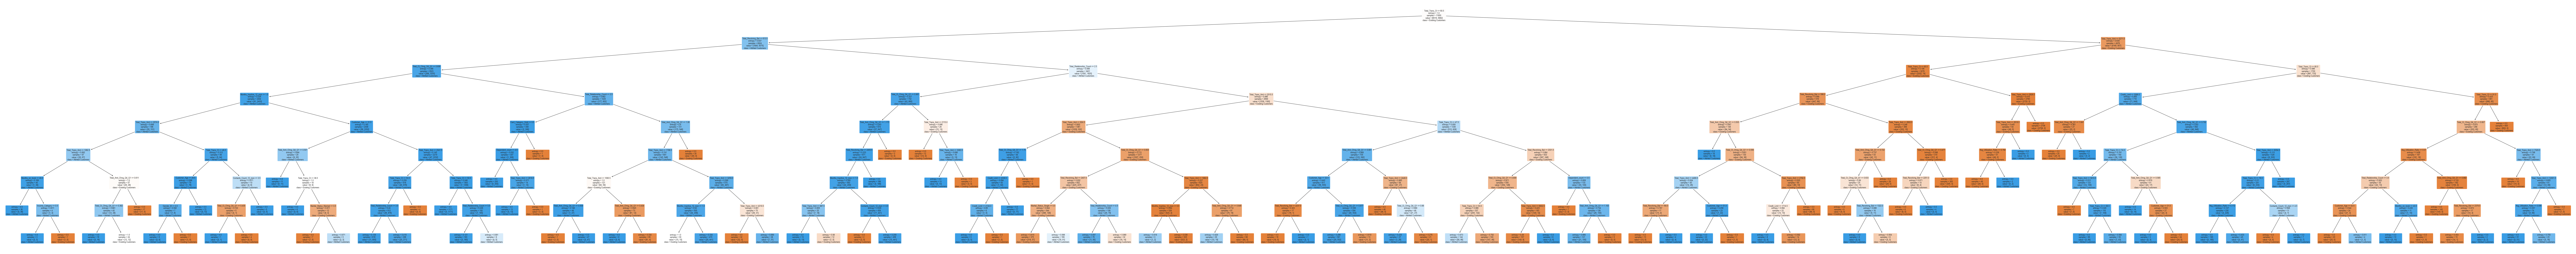

In [ ]:
#plot decision tree
f2 = plt.figure(figsize=(200,20))
plot_tree(dt2, filled=True, rounded=True, 
          feature_names=df_X.columns,
          class_names=['Existing Customers','Attrited Customers'])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9584873949579832

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9407843137254902

                   precision    recall  f1-score   support

Existing Customer       0.96      0.91      0.94      2482
Attrited Customer       0.92      0.97      0.94      2618

         accuracy                           0.94      5100
        macro avg       0.94      0.94      0.94      5100
     weighted avg       0.94      0.94      0.94      5100



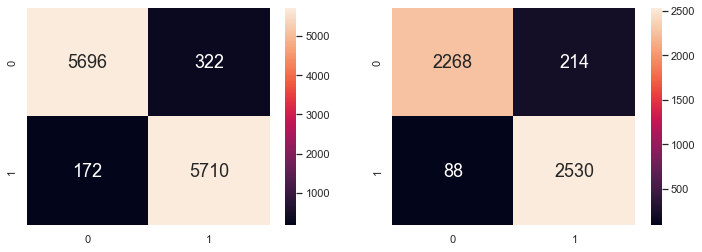

In [ ]:
# Predict Legendary values corresponding to Total
y_train_pred = dt2.predict(X_train)
y_test_pred = dt2.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dt2.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dt2.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
print(classification_report(y_test, y_test_pred, target_names=['Existing Customer','Attrited Customer']))

Calculate True Positive rate:

True Positive = TP/(TP+FN) <br>
              = 2268/(2268+88) <br>
              = 0.9626485569